In [1]:
# importing libraries and reading csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [5]:
# checking imbalance in data
499/526

0.9486692015209125

In [6]:
# creating X and y
X = df.drop("target", axis = "columns")
y = df["target"]

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##  Train Test split 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [9]:
X_train.shape, X_test.shape

((717, 13), (308, 13))

y_train.value_counts()

374/394

x_train = pd.DataFrame(X_train)
x_train.corr()

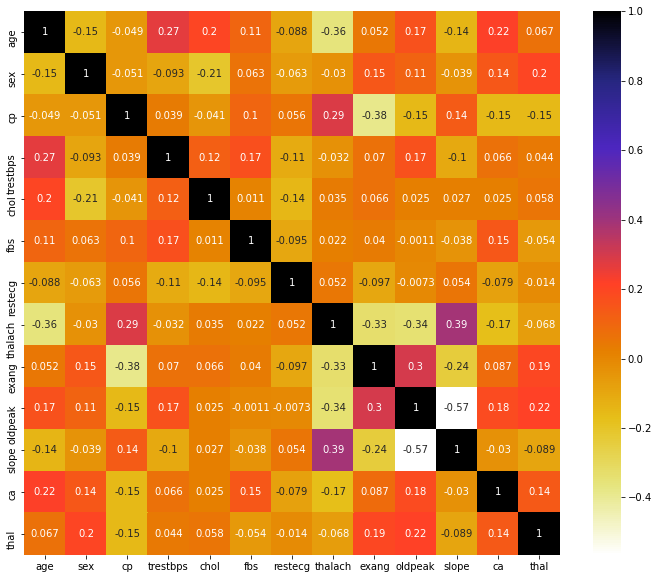

In [10]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [11]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X_train, 0.3)
len(set(corr_features))

4

In [13]:
corr_features

{'exang', 'oldpeak', 'slope', 'thalach'}

In [14]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

## Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train[:]

array([[ 0.05394095,  0.67625223,  0.04592641, ...,  0.87921361,
        -0.72516601, -0.50917692],
       [-1.15811675,  0.67625223,  1.01443332, ...,  0.87921361,
        -0.72516601, -0.50917692],
       [ 0.38450214,  0.67625223, -0.9225805 , ..., -1.00256597,
         1.21131083,  1.10622066],
       ...,
       [-0.38680731,  0.67625223,  1.01443332, ...,  0.87921361,
        -0.72516601, -0.50917692],
       [-0.16643318, -1.4787382 , -0.9225805 , ..., -1.00256597,
        -0.72516601, -0.50917692],
       [ 0.82525039, -1.4787382 , -0.9225805 , ...,  0.87921361,
        -0.72516601, -0.50917692]])

## Decision Tree

In [53]:
"""DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
class_weight=None, ccp_alpha=0.0)"""
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(splitter = "random", min_samples_leaf = 2,random_state = 10, max_leaf_nodes = 100)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8831168831168831

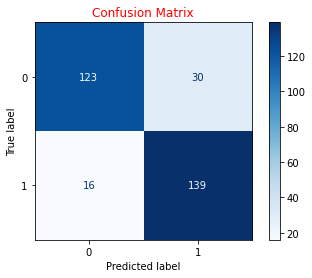

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(dt_model, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color="red")
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       153
           1       0.82      0.90      0.86       155

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



In [21]:
from sklearn.ensemble import BaggingClassifier
bag_modelDT = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(splitter ="random", min_samples_split = 2),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0
)
bag_modelDT.fit(X_train, y_train)
bag_modelDT.oob_score_

0.9874476987447699

In [22]:
bag_modelDT.score(X_test, y_test)

0.9675324675324676

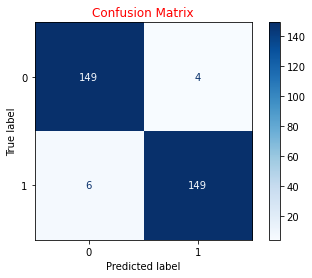

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_pred = bag_modelDT.predict(X_test)
confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(bag_modelDT, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color="red")
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       153
           1       0.97      0.96      0.97       155

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [25]:
df.loc[450, :]

age          63.0
sex           0.0
cp            0.0
trestbps    150.0
chol        407.0
fbs           0.0
restecg       0.0
thalach     154.0
exang         0.0
oldpeak       4.0
slope         1.0
ca            3.0
thal          3.0
target        0.0
Name: 450, dtype: float64

In [26]:
X_train.shape

(717, 9)

In [27]:
#predicting using 9 features
bag_modelDT.predict(np.array([63.0,  0.0, 3.0, 200.0, 564.0, 1.0, 2.0, 3.0, 3.0]).reshape(1,-1))[0]

0

In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
df.loc[317, :]

age          63.0
sex           0.0
cp            2.0
trestbps    135.0
chol        252.0
fbs           0.0
restecg       0.0
thalach     172.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 317, dtype: float64

In [30]:
#predicting using 9 features
bag_modelDT.predict(np.array([63.0,  0.0, 2.0, 135.0, 252.0, 0.0, 0.0, 2.0, 1.0]).reshape(1,-1))[0]

0

## Simple Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()#(max_depth = 2, min_samples_leaf=2, random_state= 10)
rc.fit(X_train, y_train)

y_pred = rc.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9707792207792207

In [33]:
#predicting using 9 features
rc.predict(np.array([63.0,  0.0, 2.0, 135.0, 252.0, 0.0, 0.0, 2.0, 1.0]).reshape(1,-1))[0]

0

## Confusion matrix for Random Forest

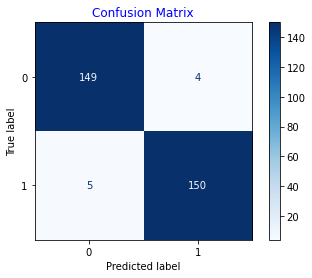

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_pred = rc.predict(X_test)
confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(rc, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color="Blue")
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.97      0.97      0.97       155

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



## Bagging method with Random Forest 

In [37]:
from sklearn.ensemble import BaggingClassifier
bag_modelRF = BaggingClassifier(
    base_estimator = RandomForestClassifier(),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0
)
bag_modelRF.fit(X_train, y_train)
bag_modelRF.oob_score_

0.9804741980474198

In [38]:
bag_modelRF.score(X_test, y_test)

0.9512987012987013

In [39]:
bag_modelRF.predict(np.array([63.0,  0.0, 2.0, 135.0, 252.0, 0.0, 0.0, 2.0, 1.0]).reshape(1,-1))[0]

0

## Confusion matrix for Bagging with Random Forest

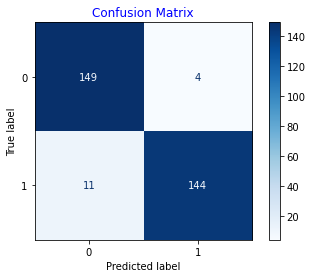

In [40]:
y_pred = bag_modelRF.predict(X_test)
confusion_matrix(y_test, y_pred)
matrix = plot_confusion_matrix(bag_modelRF, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color="Blue")
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       153
           1       0.97      0.93      0.95       155

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



## Create KNN (K- Nearest Neighbour Classifier)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8798701298701299

In [43]:
knn.predict(np.array([63.0,  0.0, 2.0, 135.0, 252.0, 0.0, 0.0, 2.0, 1.0]).reshape(1,-1))[0]

1

## confusion matrix for KNN

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[143,  10],
       [ 27, 128]], dtype=int64)

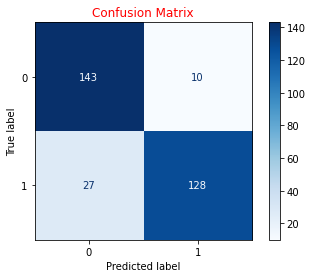

In [45]:
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color="Red")
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       153
           1       0.93      0.83      0.87       155

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308



## Bagging method with KNN 

In [47]:
from sklearn.ensemble import BaggingClassifier
bag_modelKNN = BaggingClassifier(
    base_estimator = KNeighborsClassifier(n_neighbors= 4),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0
)
bag_modelKNN.fit(X_train, y_train)
# result on oob values
bag_modelKNN.oob_score_

0.8856345885634589

In [48]:
bag_modelKNN.score(X_test, y_test)

0.8928571428571429

In [49]:
bag_modelKNN.predict(np.array([63.0,  0.0, 2.0, 135.0, 252.0, 0.0, 0.0, 2.0, 1.0]).reshape(1,-1))[0]

1

## Confusion Matrix for Bagging with KNN

In [50]:
from sklearn.metrics import confusion_matrix
y_pred = bag_modelKNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[142,  11],
       [ 22, 133]], dtype=int64)

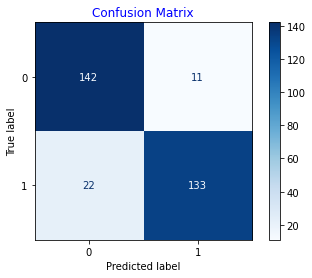

In [51]:
matrix = plot_confusion_matrix(bag_modelKNN, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color="Blue")
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       153
           1       0.92      0.86      0.89       155

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308



df.loc[450, :]

X_train.shape

#predicting using 9 features
bag_model.predict(np.array([63.0,  0.0, 3.0, 200.0, 564.0, 1.0, 2.0, 3.0, 3.0]).reshape(1,-1))[0]

df.describe()

df.loc[317, :]

#predicting using 9 features
bag_model.predict(np.array([63.0,  0.0, 2.0, 135.0, 252.0, 0.0, 0.0, 2.0, 1.0]).reshape(1,-1))[0]

#predicting using 9 features
rc.predict(np.array([63.0,  0.0, 2.0, 135.0, 252.0, 0.0, 0.0, 2.0, 1.0]).reshape(1,-1))[0]

from sklearn.ensemble import BaggingClassifier
bag_modelRF = BaggingClassifier(
    base_estimator = RandomForestClassifier(),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0
)
bag_modelRF.fit(X_train, y_train)
bag_modelRF.oob_score_

bag_modelRF.predict(np.array([63.0,  0.0, 2.0, 135.0, 252.0, 0.0, 0.0, 2.0, 1.0]).reshape(1,-1))[0]